Import package

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets 
import matplotlib.pyplot as plt
from torchvision import transforms

Datasets (CIFAR10)

In [2]:
data_path='./cifar10_datasets/'
cifar10_train=datasets.CIFAR10(data_path, train=True, download=True,transform=transforms.ToTensor())
cifar10_val=datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Plot the figures

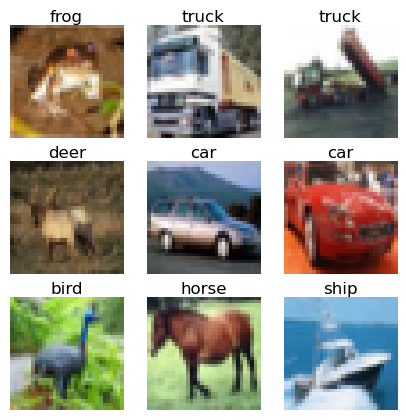

In [3]:
plt.figure(figsize=(5,5))
for i in range(9):    
    img, label=cifar10_train[i]
    plt.subplot(3,3,i+1)
    #img.shape
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

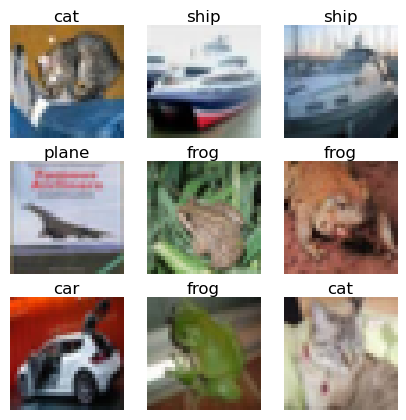

In [4]:
plt.figure(figsize=(5,5))
for i in range(9):    
    img, label=cifar10_val[i]
    plt.subplot(3,3,i+1)
    #img.shape
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

Normalization

In [5]:
imgs=torch.stack([img for img, _ in cifar10_train], dim=-1)
imgs.shape
imgs_t=imgs.view(3,-1)
imgs_t.shape
imgs_mean=imgs_t.mean(dim=1)
imgs_std=imgs_t.std(dim=1)

In [6]:
normalize_cifar10_train=datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(imgs_mean, imgs_std)]))
normalize_cifar10_val=datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(imgs_mean, imgs_std)]))

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892126..2.0945773].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.909839..2.1008143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.658118..2.1267893].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7708598..1.7254728].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892126..2.0429673].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8997078..2.0112178].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8622148.

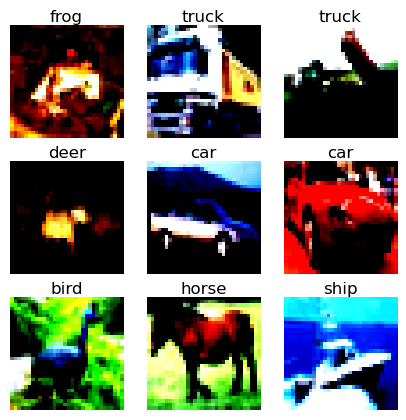

In [7]:
plt.figure(figsize=(5,5))
for i in range(9):
    img, label=normalize_cifar10_train[i]
    plt.subplot(3,3,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7828412..2.0945773].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892126..1.9958744].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9257137..2.0708315].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.44874..1.8009862].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8780895..1.5630796].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9158138..1.3603542].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9733379.

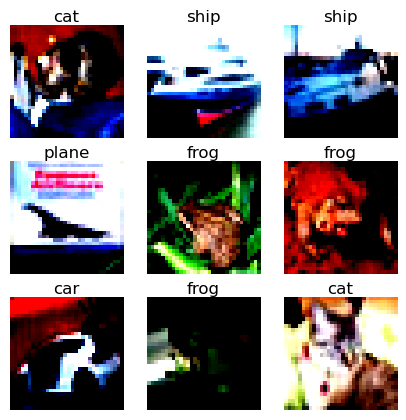

In [8]:
plt.figure(figsize=(5,5))
for i in range(9):
    img, label=normalize_cifar10_val[i]
    plt.subplot(3,3,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

Configurations

In [9]:
''' Homework!!! You have to fill the number in this block to achieve basic score '''
input_dim=3072
lr=1e-3 # learning rate, suggest from 1e-3 to 1e-5
batch_size=32 # batch size, suggest 10~250
n_epoch=1000  # number of epoch, suggest from 1000 to 5000
best_loss=100000 # initial best loss, suggest large enogh like 100000
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

Model(Linear)

In [ ]:
fc_model=nn.Sequential(
      nn.Linear(input_dim, 128),
      nn.Tanh(),
      nn.Linear(128,64),
      nn.Tanh(),
      nn.Linear(64,10))
fc_model.to(device)

Model(Convolution)

In [11]:
''' Homework!!! You have to fill the number in this block to achieve basic score '''
class Convnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.dropout1 = nn.Dropout2d(p=0.25)  # 添加 dropout
        
        self.conv2 = nn.Conv2d(32, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.dropout2 = nn.Dropout2d(p=0.25)  # 添加 dropout
        
        self.linear1 = nn.Linear(8*8*8, 128)
        self.act3 = nn.Tanh()
        self.dropout3 = nn.Dropout(p=0.5)     # 添加 dropout
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        out=self.pool1(self.act1(self.conv1(x)))
        #out=self.dropout1(XX)
        out=self.pool2(self.act2(self.conv2(out)))
        #out=self.dropout2(XX)
        out=out.view(-1,8*8*8)
        out=self.linear2(self.act3(self.linear1(out)))
        return out

In [12]:
conv_model=Convnet().to(device)

Loss function

In [13]:
loss_fn=nn.CrossEntropyLoss()

Optimizer

In [14]:
optimizer=optim.SGD(conv_model.parameters(),lr)

DataLoader

In [15]:
train_loader=torch.utils.data.DataLoader(normalize_cifar10_train, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader=torch.utils.data.DataLoader(normalize_cifar10_val, batch_size=batch_size, shuffle=True)

Training Loop

In [16]:
def training(model, n_epoch, loss_fn, optimizer, train_loader, val_loader,best_loss):
    for epoch in range(n_epoch):
        model.train()
        for img, label in train_loader:
            img=img.to(device)
            label=label.to(device)
            label_p=model(img)
            loss=loss_fn(label_p, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        for img, label in val_loader:
            img=img.to(device)
            label=label.to(device)
            with torch.no_grad():
                label_vp=model(img)
                loss_v=loss_fn(label_vp, label)
                if loss_v<best_loss:
                    best_loss=loss_v
                    torch.save(conv_model.state_dict(), './best_model_conv_s.pt')
                    print(f"Saving best model with best loss: {best_loss}")
        print(f"Epoch: {epoch}, Loss: {loss}")

Training !

In [17]:
training(model=conv_model, n_epoch=n_epoch, loss_fn=loss_fn, optimizer=optimizer, train_loader=train_loader, val_loader=val_loader, best_loss=best_loss)

Saving best model with best loss: 2.2862725257873535
Saving best model with best loss: 2.27862548828125
Saving best model with best loss: 2.268556833267212
Saving best model with best loss: 2.264239549636841
Epoch: 0, Loss: 2.317009210586548
Saving best model with best loss: 2.2386796474456787
Saving best model with best loss: 2.2341597080230713
Saving best model with best loss: 2.233983039855957
Saving best model with best loss: 2.233834743499756
Epoch: 1, Loss: 2.229557752609253
Saving best model with best loss: 2.2330517768859863
Saving best model with best loss: 2.219924211502075
Saving best model with best loss: 2.215996026992798
Saving best model with best loss: 2.199989080429077
Saving best model with best loss: 2.195080041885376
Saving best model with best loss: 2.1940536499023438
Saving best model with best loss: 2.1915626525878906
Saving best model with best loss: 2.1800644397735596
Saving best model with best loss: 2.1771934032440186
Epoch: 2, Loss: 2.217048406600952
Saving 

KeyboardInterrupt: 

Validation

Correction: 4.0%
Correction: 4.0%
Correction: 8.0%
Correction: 12.0%
Correction: 16.0%
Correction: 20.0%
Correction: 24.0%
Correction: 28.000000000000004%
Correction: 32.0%
Correction: 36.0%
Correction: 40.0%
Correction: 44.0%
Correction: 48.0%
Correction: 52.0%
Correction: 56.00000000000001%
Correction: 56.00000000000001%
Correction: 60.0%
Correction: 60.0%
Correction: 64.0%
Correction: 68.0%
Correction: 72.0%
Correction: 76.0%
Correction: 76.0%
Correction: 80.0%
Correction: 80.0%


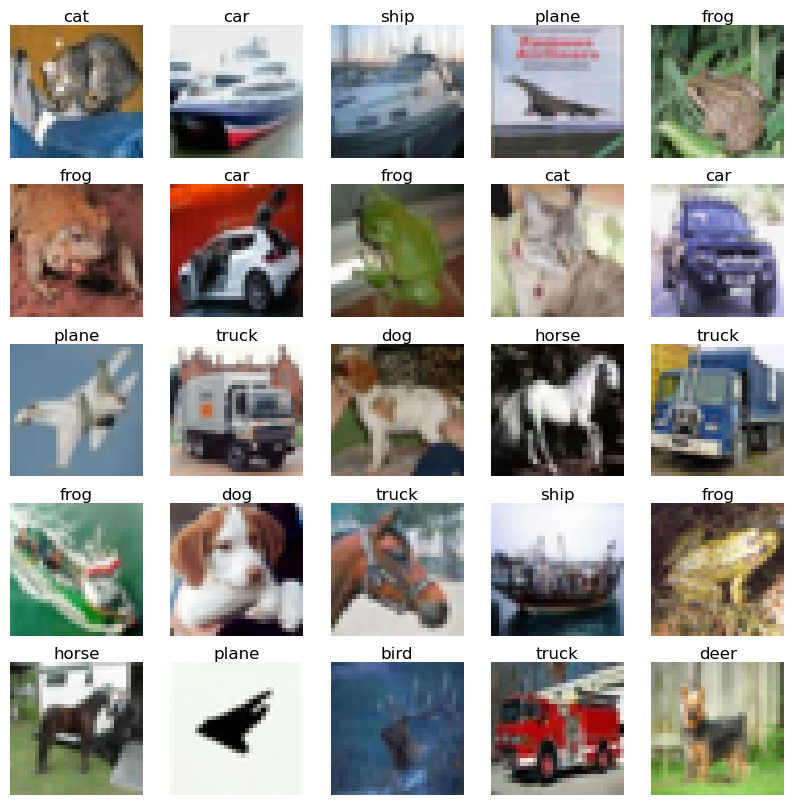

In [18]:
correction=0
conv_model.load_state_dict(torch.load('./best_model_conv_s.pt'))
conv_model.eval()
plt.figure(figsize=(10,10))
for i in range(25):
    img, label=cifar10_val[i]    
    plt.subplot(5,5,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    imgs, _=normalize_cifar10_val[i]
    imgs=imgs.to(device)
    imgs=imgs.unsqueeze(0)
    imgs=imgs
    imgs_p=conv_model(imgs)
    _, label_p=torch.max(imgs_p, dim=1)
    plt.title(classes[label_p], x=0.5, y=0.96)
    if label_p==label:
        correction=correction+1
        correction_ratio=correction/25*100
    print(f"Correction: {correction_ratio}%")